In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [5]:
def g_t(t,v):
    s=0
    for i in range(2*d):
        s=s+np.log(b[i]-(A[i,:].reshape(1,-1)).dot(v))
    aux=np.dot(v.T,Q.dot(v))+np.dot(p.T,v)
    return(t*aux-s)

In [6]:
def grad_g_t(t,v):
    s=0
    for i in range(2*d):
        s=s+A[i,:].reshape(-1,1)/(b[i]-(A[i,:].reshape(1,-1)).dot(v))
    aux=(Q+Q.T).dot(v)+p
    return(t*aux+s)

In [7]:
def hess_g_t(t,v):
    s=0
    for i in range(2*d):
        s=s+(A[i,:].reshape(-1,1).dot(A[i,:].reshape(1,-1))/((b[i]-A[i,:].dot(v))**2))
    aux=Q+Q.T 
    return(t*aux+s)

In [8]:
def backtracking(alpha,beta,v,v_step,t):
    t_tilde=1
    while not((b-A.dot(v+t_tilde*v_step)>0).all()) or g_t(t,v+t_tilde*v_step)>g_t(t,v)+alpha*t_tilde*np.dot(grad_g_t(t,v).T,v_step):
        t_tilde=beta*t_tilde
    return t_tilde

In [9]:
#Question 2 
def centering_step(Q,p,A,b,t,v0,eps):
    v_seq=[]
    v_seq.append(v0) 
    v=v0
    n_iter=0
    while True: 
        #compute Newton's step & decrement for v
        v_step=np.dot(-inv(hess_g_t(t,v)),grad_g_t(t,v))
        decr=-np.dot(grad_g_t(t,v).T,v_step)
        if (0.5*decr) <= eps:
            break 
        else :
            #backtracking line search 
            t1=backtracking(alpha,beta,v,v_step,t)
            #update
            v=v+t1*v_step
            v_seq.append(v)
            n_iter=n_iter+1
    return(n_iter, v_seq[-1])

In [10]:
def barr_method(Q,p,A,b,v0,eps,mu):
    v_seq=[]
    v_seq.append(v0) 
    v=v0
    t=1 
    n_iter2=[0]
    while True: 
        #centering step
        n_iter, v = centering_step(Q,p,A,b,t,v,eps)
        v_seq.append(v)
        n_iter2.append(n_iter2[-1]+n_iter)
        if (2*d)/t < eps:
            break 
        else :
            #update
            t=mu*t
        
    return(n_iter2, v_seq)  

In [11]:
#question 3
n=10
d=50  # high dimensional setting : d>>n

#np.random.seed(2)
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=n, n_features=d, n_informative=10, shuffle=True, coef=False, noise = 1)

In [12]:
lambda_=10
alpha=0.3
beta=0.8
eps=1e-6
mu=10

v0=np.zeros((n,1))
Q=0.5*np.eye(n)
A=np.concatenate((X.T, -X.T), axis=0)
p=y.reshape(-1,1)
b=lambda_*np.ones((2*d,1))

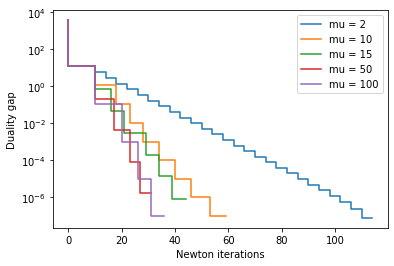

In [10]:
for mu in [2, 10, 15, 50, 100]:
    n_iter2, v_seq = barr_method(Q,p,A,b,v0,eps,mu)
    v_star = v_seq[-1]
    f_star=np.dot(v_star.T,Q.dot(v_star))+np.dot(p.T,v_star)
    
    xx=n_iter2
    xx.remove(xx[-1])
    xx=(np.array(xx)).reshape(-1,1)
    
    yy=[np.dot(v.T,Q.dot(v))+np.dot(p.T,v) - f_star for v in v_seq]
    yy.remove(yy[-1])
    yy=(np.array(yy)).reshape(-1,1)
    
    plt.step(xx, yy, label='mu = ' + str(mu))

plt.semilogy()
plt.xlabel('Newton iterations')
plt.ylabel('Duality gap')
plt.legend()

In [ ]:
acc=0
for i in range(m):
    if (y[i,i]*np.dot(v_star[0:n].T,X[i,:].reshape(-1,1)))>0:
        acc=acc+1
acc=acc/m
acc